# Практикум по анализу данных.

### Ссылка на датасет: https://www.kaggle.com/datasets/beaver68/cars-dataset-in-russia

### Данные представляют собой набор из 50+ характеристик автомобиля. Информация представленна более чем для 22 000 автомобилей из России на конец 2020 года.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
%load_ext rpy2.ipython

In [2]:
%%R
library(glue)

In [3]:
df = pd.read_csv('cars_dataset.csv', index_col = 0)

In [4]:
df.set_index(pd.Index(range(0, df.shape[0])), inplace=True)#в оригинальном датафрейме некоторые индексы пропущены
df['Year'] = df['Year'].astype('int64')
df[df.dtypes[df.dtypes == 'float64'].index] = df[df.dtypes[df.dtypes == 'float64'].index].astype('float64')
df['mark'] = df.mark.str.strip()

In [5]:
%%R -i df
df$Volume <- as.double(df$Volume)

# 1. Аппроксимация распределений данных с помощью ядерных оценок.

### Построим ядерные оценки плотности для:  
+ **объёма двигателя**    
+ **года выпуска**  
+ **пробега**  
+ **максимальной мощности**  
+ **длины и ширины автомобиля**

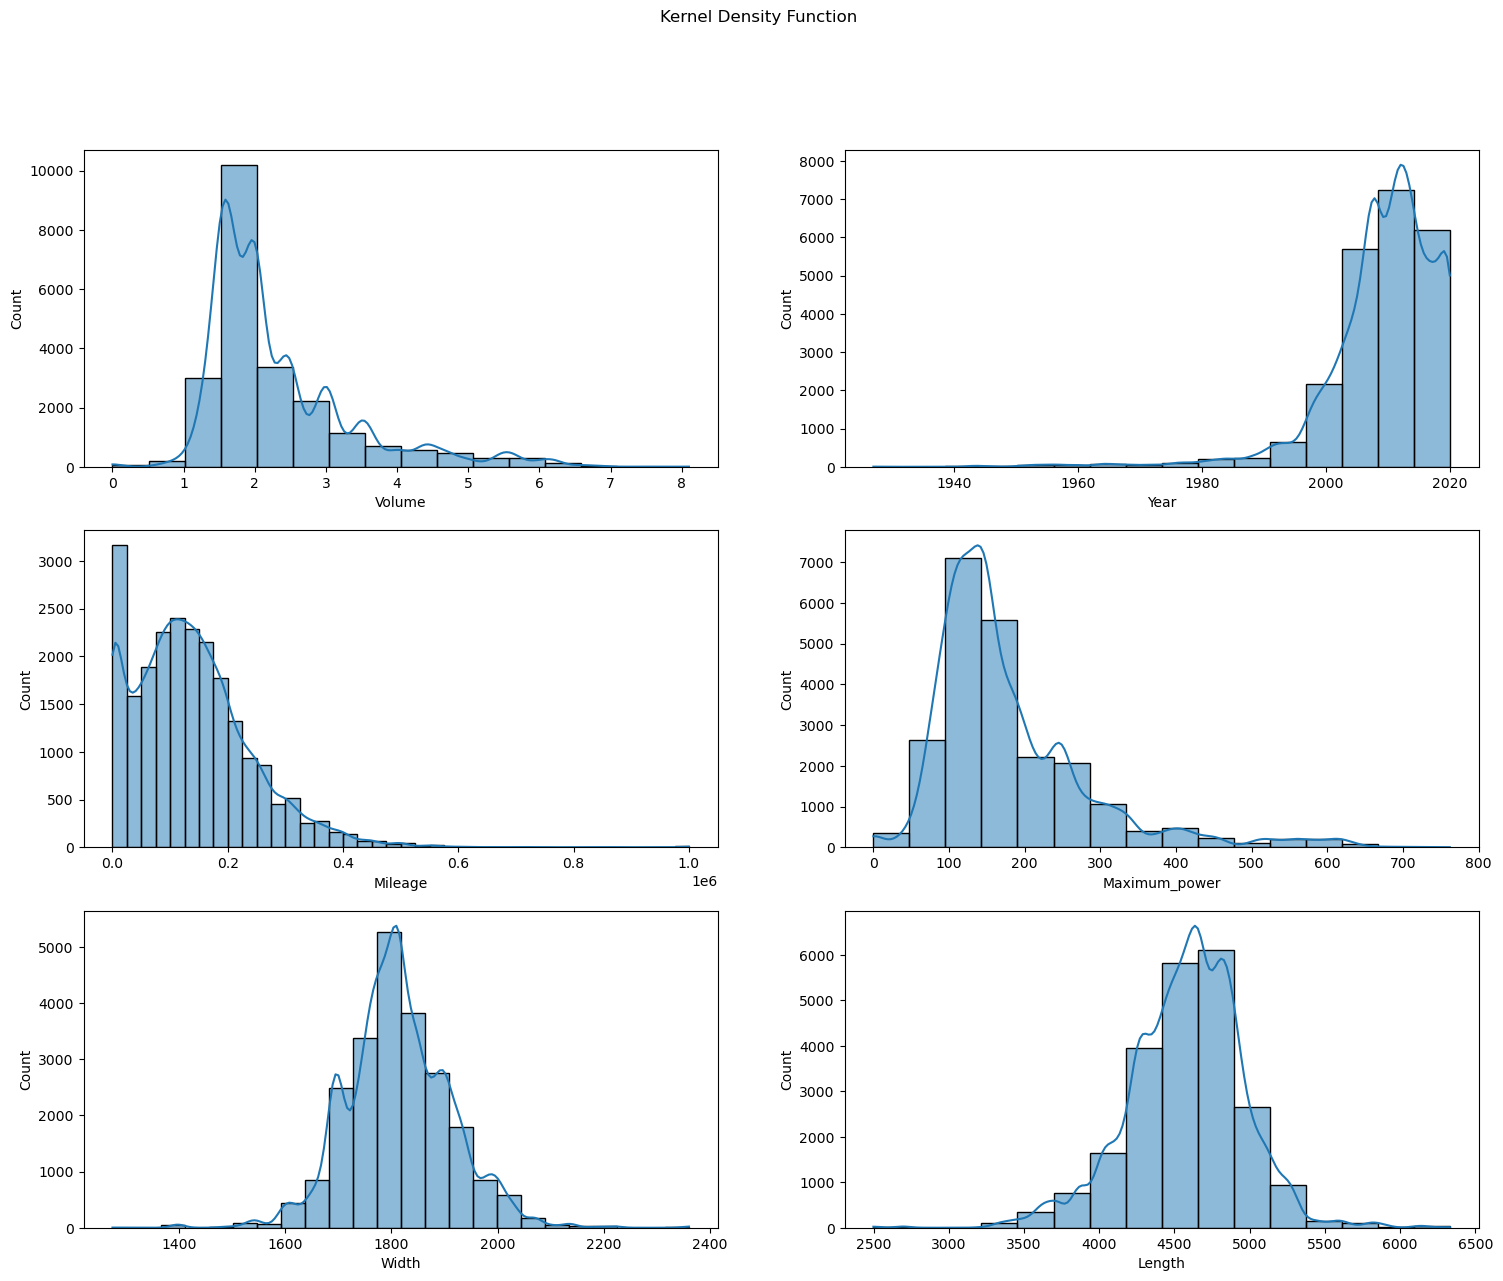

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

fig.suptitle('Kernel Density Function')

sns.histplot(ax=axes[0, 0], data = df, x='Volume', kde=True, bins = 16, common_norm=False)
sns.histplot(ax=axes[0, 1], data = df, x='Year', kde=True, bins = 16, common_norm=False)
sns.histplot(ax=axes[1, 0], data = df, x='Mileage', kde=True, bins = 40, common_norm=False)
sns.histplot(ax=axes[1, 1], data = df, x='Maximum_power', kde=True, bins = 16, common_norm=False)
sns.histplot(ax=axes[2, 0], data = df, x='Width', kde=True, bins = 24, common_norm=False)
sns.histplot(ax=axes[2, 1], data = df, x='Length', kde=True, bins = 16, common_norm=False);

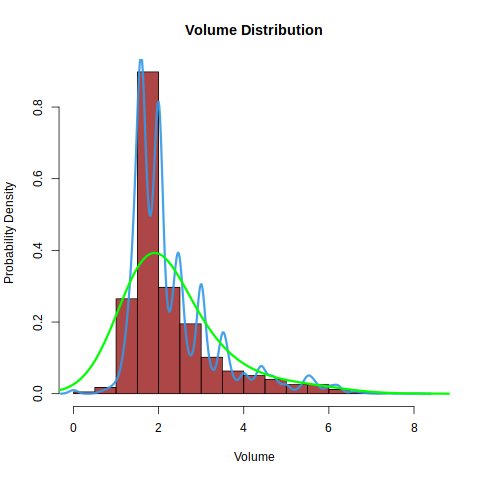

In [7]:
%%R
hist(df$Volume, breaks = 16, freq = FALSE, col = rgb(0.6, 0.1, 0.1, 0.8),
     xlab = "Volume",
     ylab = "Probability Density",
     main = "Volume Distribution")
lines(density(df$Volume), col = rgb(0.2, 0.6, 0.9, 0.9), lwd = 3)
lines(density(df$Volume, bw=0.7), col = "green", lwd = 3)

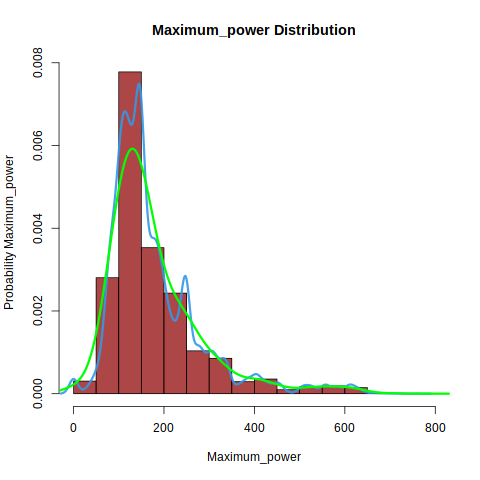

In [8]:
%%R
hist(df$Maximum_power, breaks = 12, freq = FALSE, col = rgb(0.6, 0.1, 0.1, 0.8),
     xlab = "Maximum_power",
     ylab = "Probability Maximum_power",
     main = "Maximum_power Distribution")
lines(density(df$Maximum_power), col = rgb(0.2, 0.6, 0.9, 0.9), lwd = 3)
lines(density(df$Maximum_power, bw=30.), col = "green", lwd = 3)

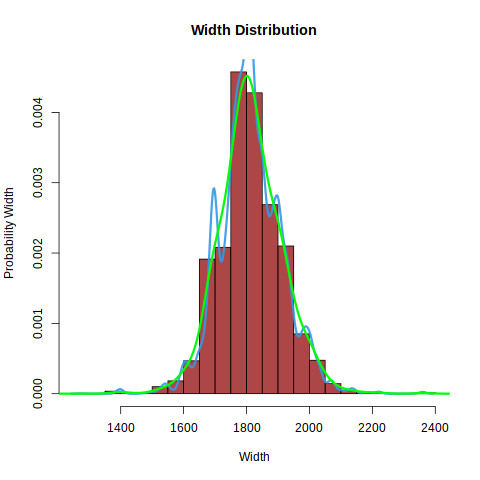

In [9]:
%%R
hist(df$Width, breaks = 16, freq = FALSE, col = rgb(0.6, 0.1, 0.1, 0.8),
     xlab = "Width",
     ylab = "Probability Width",
     main = "Width Distribution")
lines(density(df$Width), col = rgb(0.2, 0.6, 0.9, 0.9), lwd = 3)
lines(density(df$Width, bw=30.), col = "green", lwd = 3)

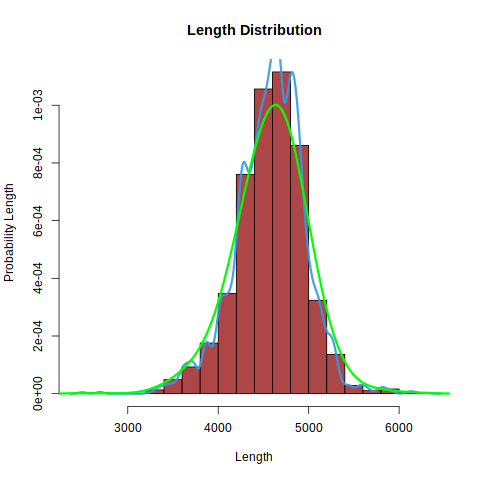

In [10]:
%%R
hist(df$Length, breaks = 24, freq = FALSE, col = rgb(0.6, 0.1, 0.1, 0.8),
     xlab = "Length",
     ylab = "Probability Length",
     main = "Length Distribution")
lines(density(df$Length), col = rgb(0.2, 0.6, 0.9, 0.9), lwd = 3)
lines(density(df$Length, bw=200.), col = "green", lwd = 3)

# 2. Анализ данных с помощью cdplot, dotchart, boxplot и stripchart.

### Построим график зависимости цены от пробега для автомобилей марки BMW

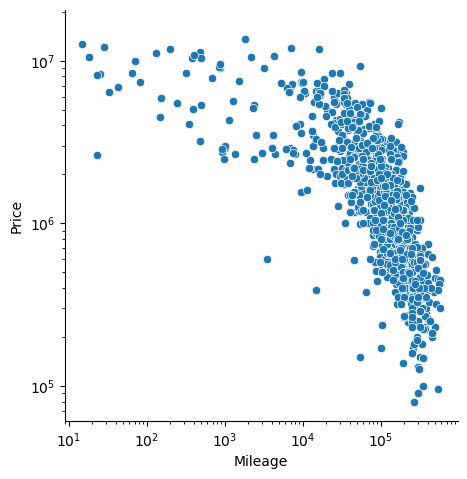

In [11]:
sns.relplot(x='Mileage',\
            y='Price',\
            data=df[df.mark == "BMW"])
plt.xscale('log')
plt.yscale('log')

### Видно, что цена на автомобили с меньшем пробегом выше.  
### Посмотрим как ведёт себя эта зависимость на разных типах коробки передач

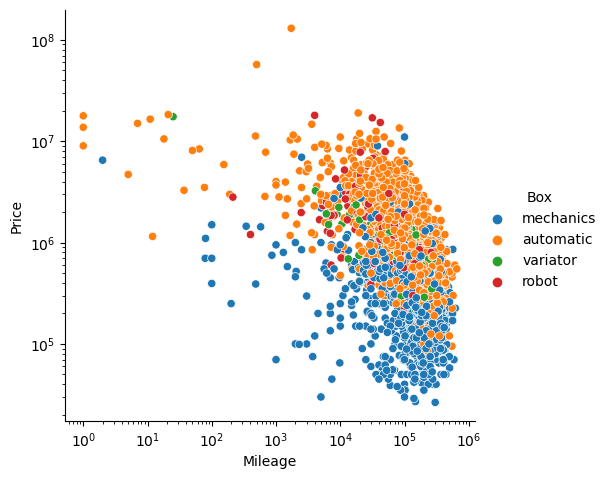

In [12]:
sns.relplot(x = 'Mileage',\
            y = 'Price',\
            data = df.sample(5000),
            hue = "Box")
plt.xscale('log')
plt.yscale('log')

### Заметим, что в среднем цена на автомобили с механической коробкой передач ниже чем на автомобили с автоматической коробкой.  Построим boxplot и убедимся в этом.

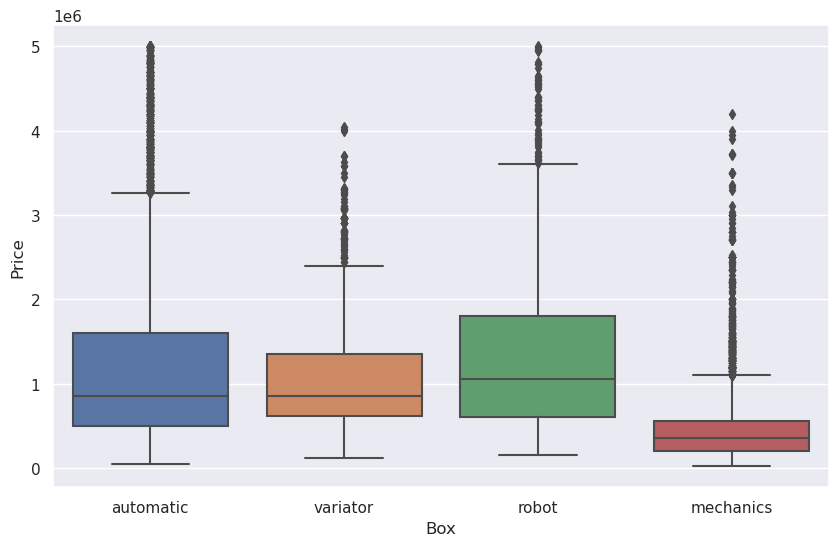

In [13]:
sns.set (rc={"figure.figsize":( 10 , 6 )})
sns.boxplot(x='Box', y='Price', data=df[df.Price < 5 * 10**6]);
#взяли только автомобили с ценой ниже 5 млн руб, чтобы получить качественный график

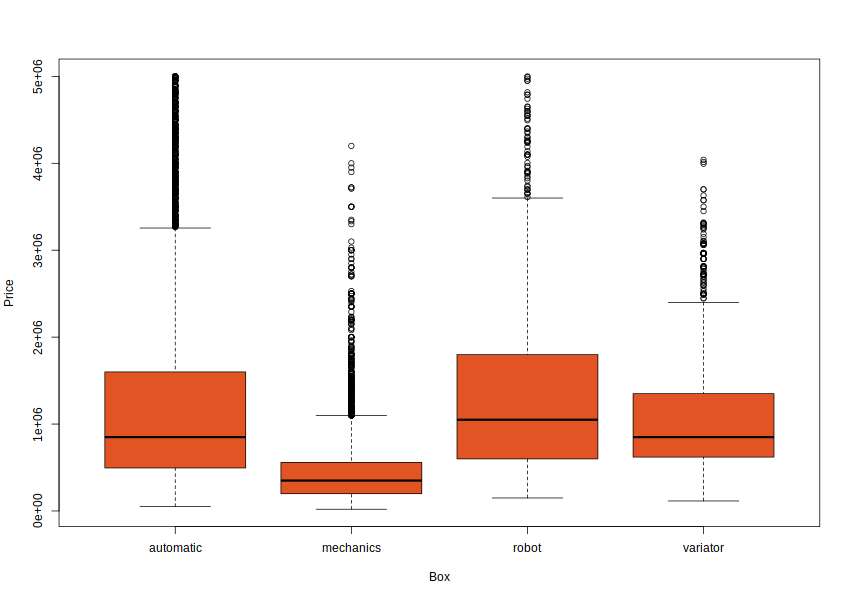

In [15]:
%%R -w 850 -h 600
data = subset(df, Price < 5 * 10**6, select = c('Box', "Price"))
boxplot(Price ~ Box, col = rgb(0.89, 0.33, 0.14, 1),  data = data)

### Пожалуй тремя самыми дорогими и попурными марками автомобилей в России считаются Mercedes, BMW и Audi. Возьмём 10 самых попурных марок автомобилей и построим boxplot цены. 

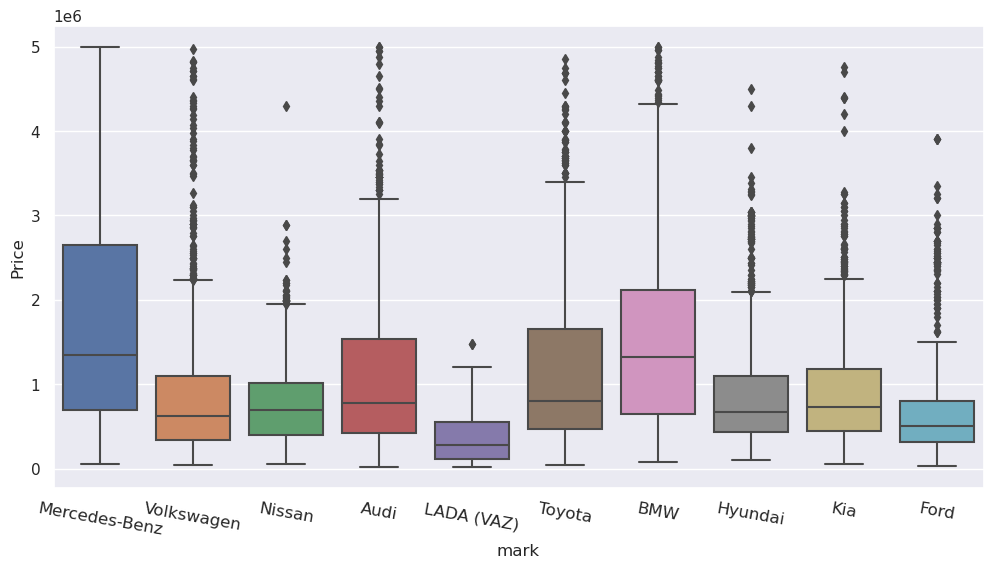

In [16]:
top_10_popular_marks = df.mark.value_counts().sort_values(ascending=False)[:10].index
mark_prices = df[df.mark.isin(top_10_popular_marks) & (df.Price < 5 * 10**6)]
sns.set (rc={"figure.figsize":( 12 , 6 )})
sns.boxplot(x='mark', y='Price', data=mark_prices)
plt.tick_params(axis='x', which='major', labelsize=12, rotation=-10)

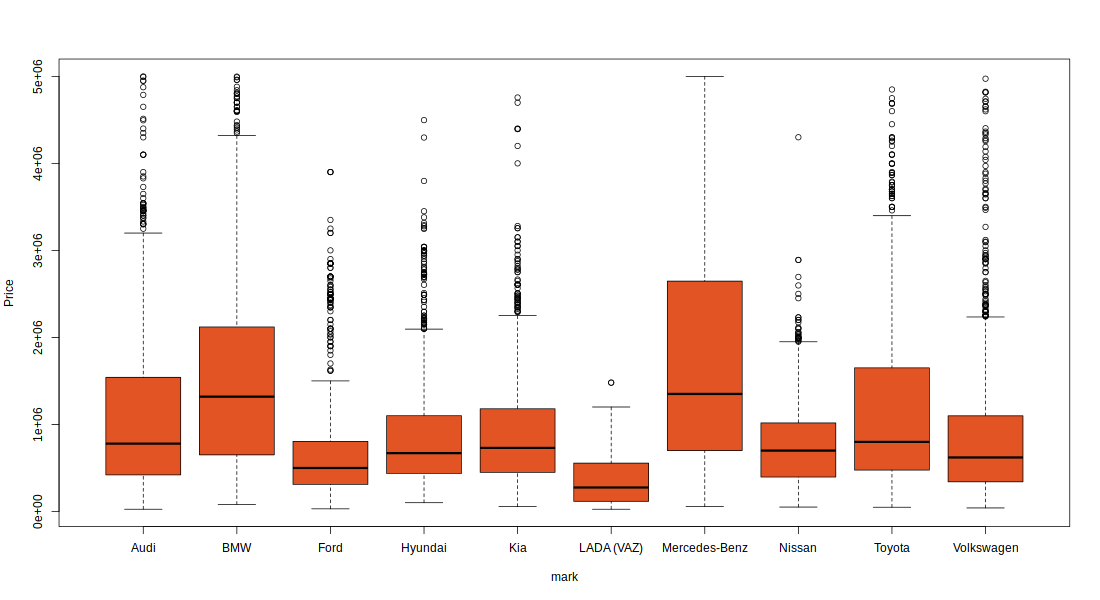

In [17]:
%%R -i mark_prices -w 1100 -h 600
library(repr)
boxplot(Price ~ mark, col = rgb(0.89, 0.33, 0.14, 1),  data = mark_prices)

### Также построим boxplot цены для 10 самых популярных стран производителей.

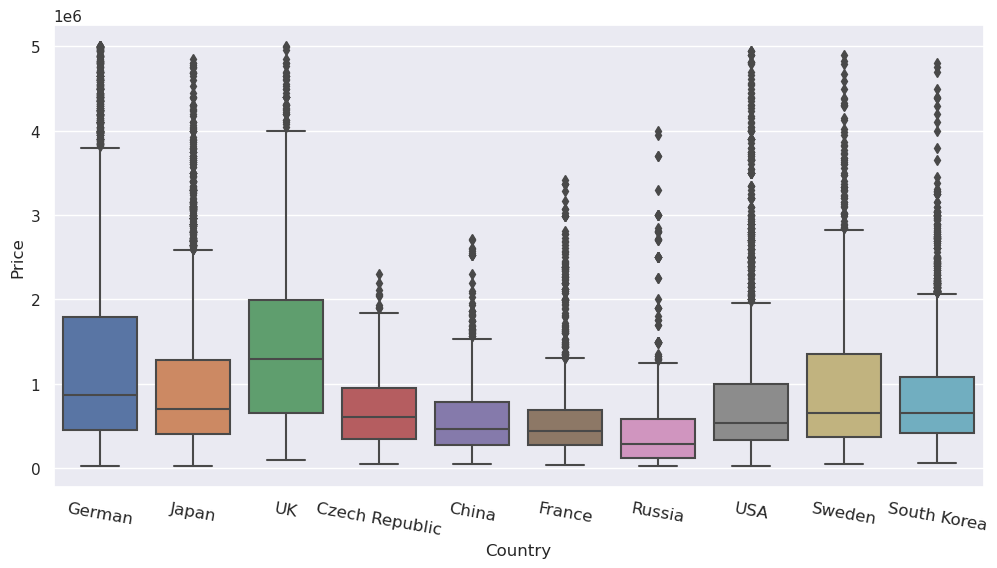

In [18]:
top_10_popular_countries = df.Country.value_counts().sort_values(ascending=False)[:10].index
country_prices = df[df.Country.isin(top_10_popular_countries) & (df.Price < 5 * 10**6)]
sns.set (rc={"figure.figsize":( 12 , 6 )})
sns.boxplot(x='Country', y='Price', data=country_prices)
plt.tick_params(axis='x', which='major', labelsize=12, rotation=-10)

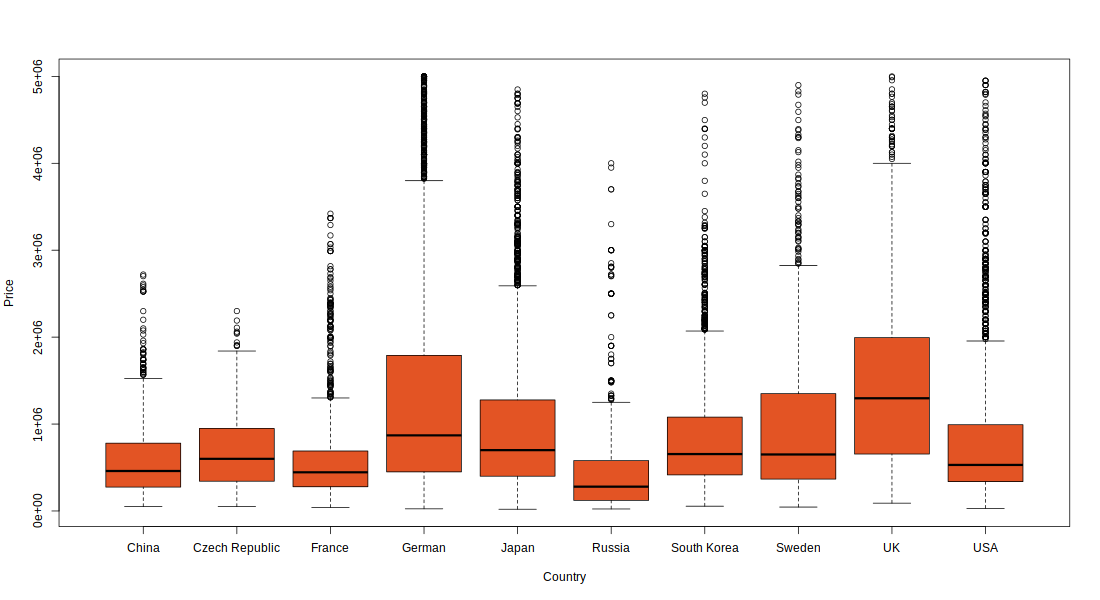

In [19]:
%%R -i country_prices -w 1100 -h 600
library(repr)
boxplot(Price ~ Country, col = rgb(0.89, 0.33, 0.14, 1),  data = country_prices)

### Очевидно, что на рынке больше ценнятся новые автомобли. Можем заметить, что зависимость цены от года выпуска экспоненциальная.

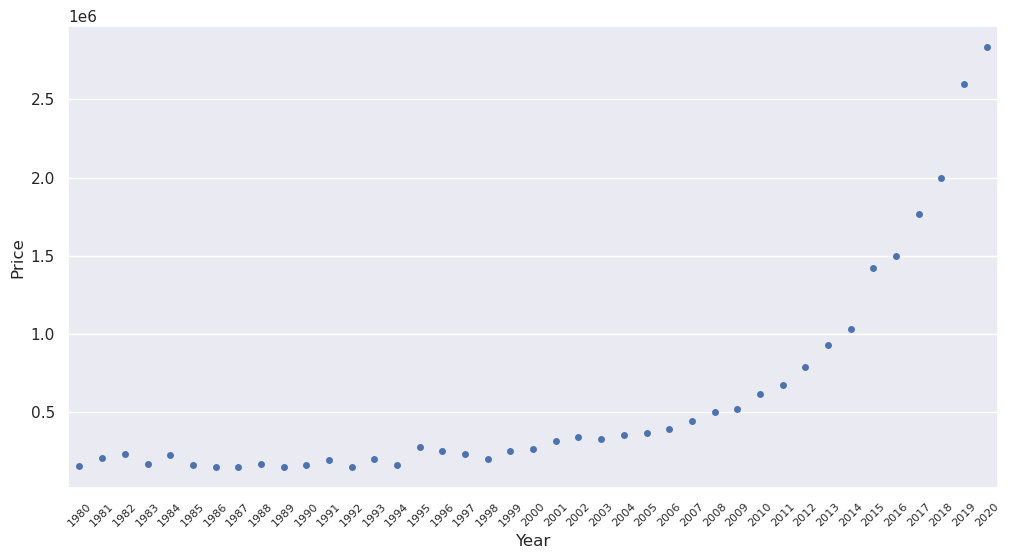

In [20]:
med_price_per_year = df.loc[df.Year >=1980, ['Year', 'Price']].groupby('Year', as_index=False).median()
sns.stripplot(x='Year', y='Price', data=med_price_per_year)
plt.tick_params(axis='x', which='major', labelsize=8, rotation=45)

plt.show()

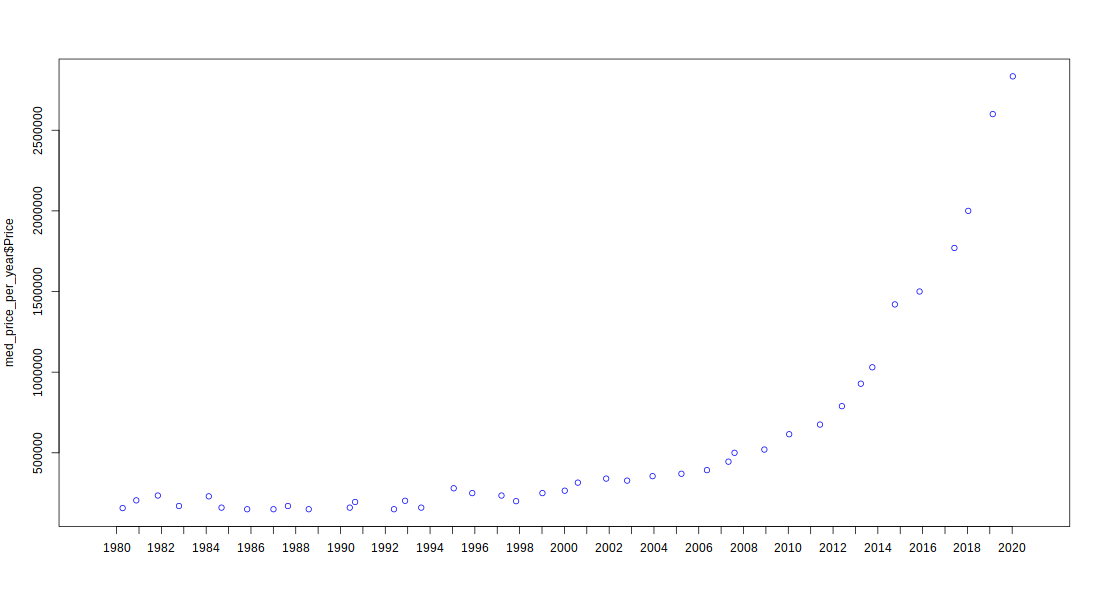

In [21]:
%%R -i med_price_per_year -w 1100 -h 600
stripchart(med_price_per_year$Price ~ med_price_per_year$Year,
           method = "jitter",
           jitter = 0.45,
           pch = 1, col = 'blue', vertical = TRUE)

### Мощность автомобиля увеличивается при увеличении количества цилиндров двигалеля 

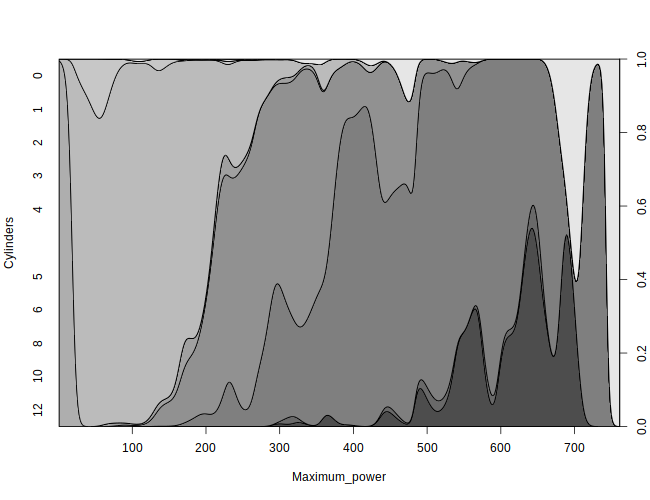

In [22]:
%%R -w 650 -h 500
df$Cylinders <- as.factor(df$Cylinders)
cdplot(Cylinders ~ Maximum_power, data=df)

### Кроме того у более тяжёлых машин (класс которых выше) мощность тоже должна быть больше. Что мы и наблюдаем ниже.

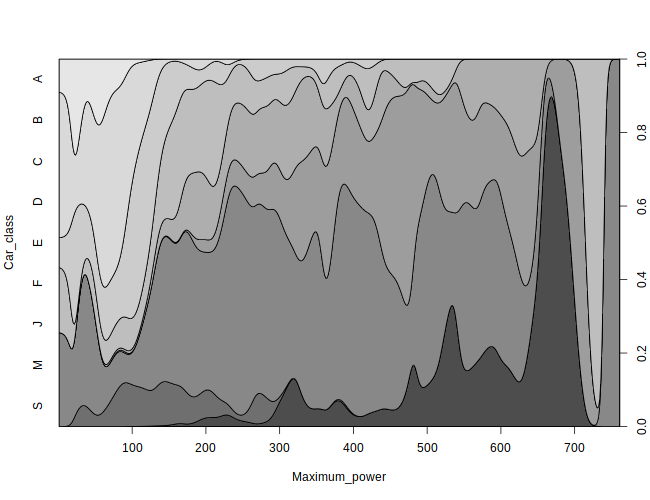

In [23]:
%%R -w 650 -h 500
df$Car_class <- as.factor(df$Car_class)
cdplot(Car_class ~ Maximum_power, data=df)

### Убедимся в этом ещё раз построив график медианной максимальной мощности от типа класса

In [24]:
med_mp_per_class = df.groupby("Car_class", as_index = False)['Maximum_power'].median().rename(\
            columns={"Maximum_power" : "Median_Maximum_power"}).sort_values("Median_Maximum_power")

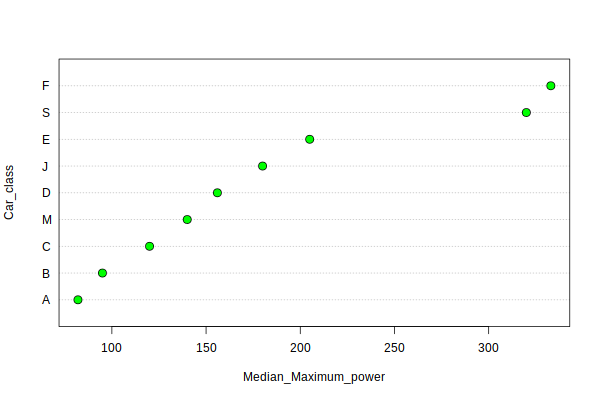

In [26]:
%%R -i med_mp_per_class -w 600 -h 400
dotchart(med_mp_per_class$Median_Maximum_power, labels = unique(med_mp_per_class$Car_class),
         pch = 21, bg = "green", pt.cex = 1.5, xlab = "Median_Maximum_power", ylab = "Car_class")

## 3. Проверка, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона. Визуализация результатов.

### Проведём тест Граббса на данных о цене автомобиля

In [27]:
from outliers import smirnov_grubbs as grubbs

len(grubbs.max_test_indices(np.array(df.Price), alpha=0.01))

728

### При уровне значимости в 1 процент тест выдаёт 728 выбросов. Посмотрим на некоторые из них.

In [29]:
df.loc[list(grubbs.max_test_indices(np.array(df.Price), alpha=0.01)),\
       ['Price', 'mark', 'Model', 'Year', 'Mileage']].sort_values("Price", ascending=False).head(10)

,Price,mark,Model,Year,Mileage
17713,130000000.0,Maybach,62,2009,1724.0
17883,130000000.0,Maybach,62,2009,1724.0
11379,57000000.0,Rolls-Royce,Phantom,2020,500.0
22374,52500000.0,Mercedes-Benz,W188,1952,12000.0
11378,51200000.0,Rolls-Royce,Phantom,2020,0.0
20798,33215000.0,Ferrari,GTC4Lusso,2020,0.0
2074,31800000.0,Rolls-Royce,Wraith,2020,0.0
20800,29531000.0,Ferrari,GTC4Lusso,2020,0.0
2077,29400000.0,Rolls-Royce,Wraith,2020,0.0
2075,29000000.0,Rolls-Royce,Wraith,2020,0.0


In [30]:
%%R
library(outliers)
grubbs.test(df$Price)


	Grubbs test for one outlier

data:  df$Price
G = 51.58498, U = 0.88277, p-value < 2.2e-16
alternative hypothesis: highest value 1.3e+08 is an outlier



In addition: Warning message:
package ‘outliers’ was built under R version 4.2.3 


In [31]:
%%R
subset(df[, c('Price', 'mark', 'Model', 'Year')], df$Price == 1.3*10**8)

        Price    mark Model Year
17713 1.3e+08 Maybach   62  2009
17883 1.3e+08 Maybach   62  2009


### Видим,  что с точки зрения цены тест считает выбросами Maybach, Rolls-Royce и Ferrari.

### Проведём тот же тест для максимальной скорости

In [32]:
grubbs.max_test_indices(np.array(df.Maximum_speed), alpha=.05),\
grubbs.max_test_indices(np.array(df.Maximum_speed), alpha=.1)

([], [19688, 19689])

In [33]:
df.loc[list(grubbs.max_test_indices(np.array(df.Maximum_speed), alpha=.1)),\
       ['Maximum_speed', 'mark', 'Model', 'Year']]

,Maximum_speed,mark,Model,Year
19688,341.0,McLaren,720S,2018
19689,341.0,McLaren,720S,2017


In [34]:
%%R
grubbs.test(df$Maximum_speed)


	Grubbs test for one outlier

data:  df$Maximum_speed
G = 4.5230, U = 0.9991, p-value = 0.0689
alternative hypothesis: highest value 341 is an outlier



In [35]:
%%R
subset(df[, c('Maximum_speed', 'mark', 'Model', 'Year')], df$Maximum_speed == 341)

      Maximum_speed    mark Model Year
19688           341 McLaren 720S  2018
19689           341 McLaren 720S  2017


### Видим, что McLaren является выбросом.

### Проведём тест Граббса для максимальной мощности автомобилей

In [36]:
np.array(grubbs.max_test_indices(np.array(df.Maximum_power), alpha=.05)).reshape(1, -1)

array([[18108, 19688, 19689, 19672, 19788, 19793, 19813, 20798, 20799,
        20800,  9496, 21487, 21488, 21489, 21490,  6523,  6524, 13317,
        13318]])

In [37]:
df.loc[list(grubbs.max_test_indices(np.array(df.Maximum_power), alpha=.05)),\
      ['Maximum_power', 'mark', 'Model', 'Year']].sort_values('Maximum_power', ascending=False).head(10)

,Maximum_power,mark,Model,Year
18108,762.0,Tesla,Model X,2016
19689,720.0,McLaren,720S,2017
19688,720.0,McLaren,720S,2018
19672,717.0,Dodge,Challenger,2020
19788,700.0,Tesla,Model S,2015
19793,700.0,Tesla,Model S,2015
19813,700.0,Tesla,Model S,2015
20799,690.0,Ferrari,GTC4Lusso,2016
20800,690.0,Ferrari,GTC4Lusso,2020
20798,690.0,Ferrari,GTC4Lusso,2020


In [38]:
%%R
grubbs.test(df$Maximum_power)


	Grubbs test for one outlier

data:  df$Maximum_power
G = 5.60700, U = 0.99862, p-value = 0.0002311
alternative hypothesis: highest value 762 is an outlier



In [39]:
%%R
subset(df[, c('Maximum_power', 'mark', 'Model', 'Year')], Maximum_power == 762)

      Maximum_power  mark    Model Year
18108           762 Tesla Model X  2016


### Тест посчитал Tesla Model X 2016 года с 762 л.с. выбросом, что справедливо. Также выбросом считается McLaren 720 S

## Q-Тест Диксона

### Тест Диксона находит выброс в выборке размера не больше 30. Проведём этот тест для максимальной мощности на срезе, который содержит Tesla Model X.

In [40]:
%%R
dixon.test(df$Maximum_power[18100:18120])


	Dixon test for outliers

data:  df$Maximum_power[18100:18120]
Q = 0.67031, p-value < 2.2e-16
alternative hypothesis: highest value 762 is an outlier



### Тоже самое проделаем с ценой и увидим  Maybach за 130 млн. р.

In [41]:
%%R
dixon.test(df$Price[17710:17730])


	Dixon test for outliers

data:  df$Price[17710:17730]
Q = 0.9556, p-value < 2.2e-16
alternative hypothesis: highest value 1.3e+08 is an outlier



# 4. Воспользоваться инструментами для заполнения пропусков в данных. Пропуски внести вручную и сравнить результаты заполнения с истинными значениями. 

### Создадим копию датафрейма и возьмём 1000 случайных объектов, которые будем заполнять пропусками

In [42]:
df_copy = df.copy()
indexes_with_gaps = df_copy.sample(1000).index

In [43]:
%R -i df_copy -i indexes_with_gaps

### Добавим пропуски и проверим, что они появились

In [44]:
df_copy.loc[indexes_with_gaps, "Volume"] = np.nan
df.Volume.isna().sum(), df_copy.Volume.isna().sum()

(0, 1000)

In [45]:
%%R
df_copy[indexes_with_gaps, c("Volume")] <- NA
print(c(sum(is.na(df[indexes_with_gaps, c("Volume")])), sum(is.na(df_copy[indexes_with_gaps, c("Volume")]))))

[1]    0 1000


### Качество заполнения будем оценивать по метрике MSE. Для начала заполним все пропуски нулями и посмотрим на mse.

In [46]:
from sklearn.metrics import mean_squared_error as mse

In [47]:
df_copy.Volume.fillna(0, inplace=True)
mse_with_fill_zeros = mse(df_copy.loc[indexes_with_gaps, 'Volume'].values,\
                          df.loc[indexes_with_gaps, 'Volume'].values)
print(f"{mse_with_fill_zeros=}")

mse_with_fill_zeros=6.4941


In [48]:
%%R
library("Metrics")
df_copy[, c("Volume")][is.na(df_copy[, c("Volume")])] <- 0
mse(df[indexes_with_gaps, c("Volume")], df_copy[indexes_with_gaps, c("Volume")])

[1] 6.41651


### Заполним проски средним значением, медианой и модой, посмотрим на MSE.

In [49]:
df_copy.loc[indexes_with_gaps, "Volume"] = np.nan
mean = df_copy.Volume.mean()
median = df_copy.Volume.median()
mode = df_copy.Volume.mode()[0]

In [50]:
df_copy.loc[indexes_with_gaps, "Volume"] = mean
mse_for_mean = mse(df_copy.loc[indexes_with_gaps, 'Volume'].values, df.loc[indexes_with_gaps, 'Volume'].values)

df_copy.loc[indexes_with_gaps, "Volume"] = median
mse_for_median = mse(df_copy.loc[indexes_with_gaps, 'Volume'].values, df.loc[indexes_with_gaps, 'Volume'].values)

df_copy.loc[indexes_with_gaps, "Volume"] = mode
mse_for_mode = mse(df_copy.loc[indexes_with_gaps, 'Volume'].values, df.loc[indexes_with_gaps, 'Volume'].values)

print(f"{mse_for_mean = }\n{mse_for_median = }\n{mse_for_mode = }")

mse_for_mean = 1.113812738473804
mse_for_median = 1.2156999999999998
mse_for_mode = 1.6313799999999998


In [51]:
%%R
df_copy[indexes_with_gaps, c("Volume")] <- NA
mean <- mean(df_copy$Volume, na.rm=TRUE)
median <- median(df_copy$Volume, na.rm=TRUE)

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
mode <- getmode(df_copy$Volume)

In [52]:
%%R
df_copy[indexes_with_gaps, c("Volume")] <- mean
mse_for_mean <- mse(df[indexes_with_gaps, c("Volume")], df_copy[indexes_with_gaps, c("Volume")])

df_copy[indexes_with_gaps, c("Volume")] <- median
mse_for_median <- mse(df[indexes_with_gaps, c("Volume")], df_copy[indexes_with_gaps, c("Volume")])

df_copy[indexes_with_gaps, c("Volume")] <- mode
mse_for_mode <- mse(df[indexes_with_gaps, c("Volume")], df_copy[indexes_with_gaps, c("Volume")])

print(glue("mse_for_mean = {mse_for_mean}\n mse_for_median = {mse_for_median}\n mse_for_mode = {mse_for_mode}"))

mse_for_mean = 1.09932181944638
mse_for_median = 1.19211
mse_for_mode = 1.59699


# 5. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью:  
- **графиков эмпирических функций распределений**  
- **квантилей**  
- **метода огибающих**  
- **стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, ШапироУилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия)**

### Сгенерируем выборки $N(0, 1), N(2000, 10000), N(5000, 16000)$ объёмами 50 и 1000

In [53]:
np.random.seed(2326)

sizes = [50, 1000]
locs = [0, 2000, 5000]
scales = [1, 100, 400]
samples_small = np.zeros((3, 50), 'float64')
samples_big = np.zeros((3, 1000), 'float64')

for i in range(len(locs)):
    samples_big[i] = norm.rvs(locs[i], scales[i], sizes[1])
    samples_small[i] = norm.rvs(locs[i], scales[i], sizes[0])

In [54]:
%%R
set.seed(2326)

sample1 <- rnorm(50, 0, 1)
sample2 <- rnorm(50, 2000, 100)
sample3 <- rnorm(50, 5000, 400)
sample4 <- rnorm(1000, 0, 1)
sample5 <- rnorm(1000, 2000, 100)
sample6 <- rnorm(1000, 5000, 400)

### Эмпирические функции распределния

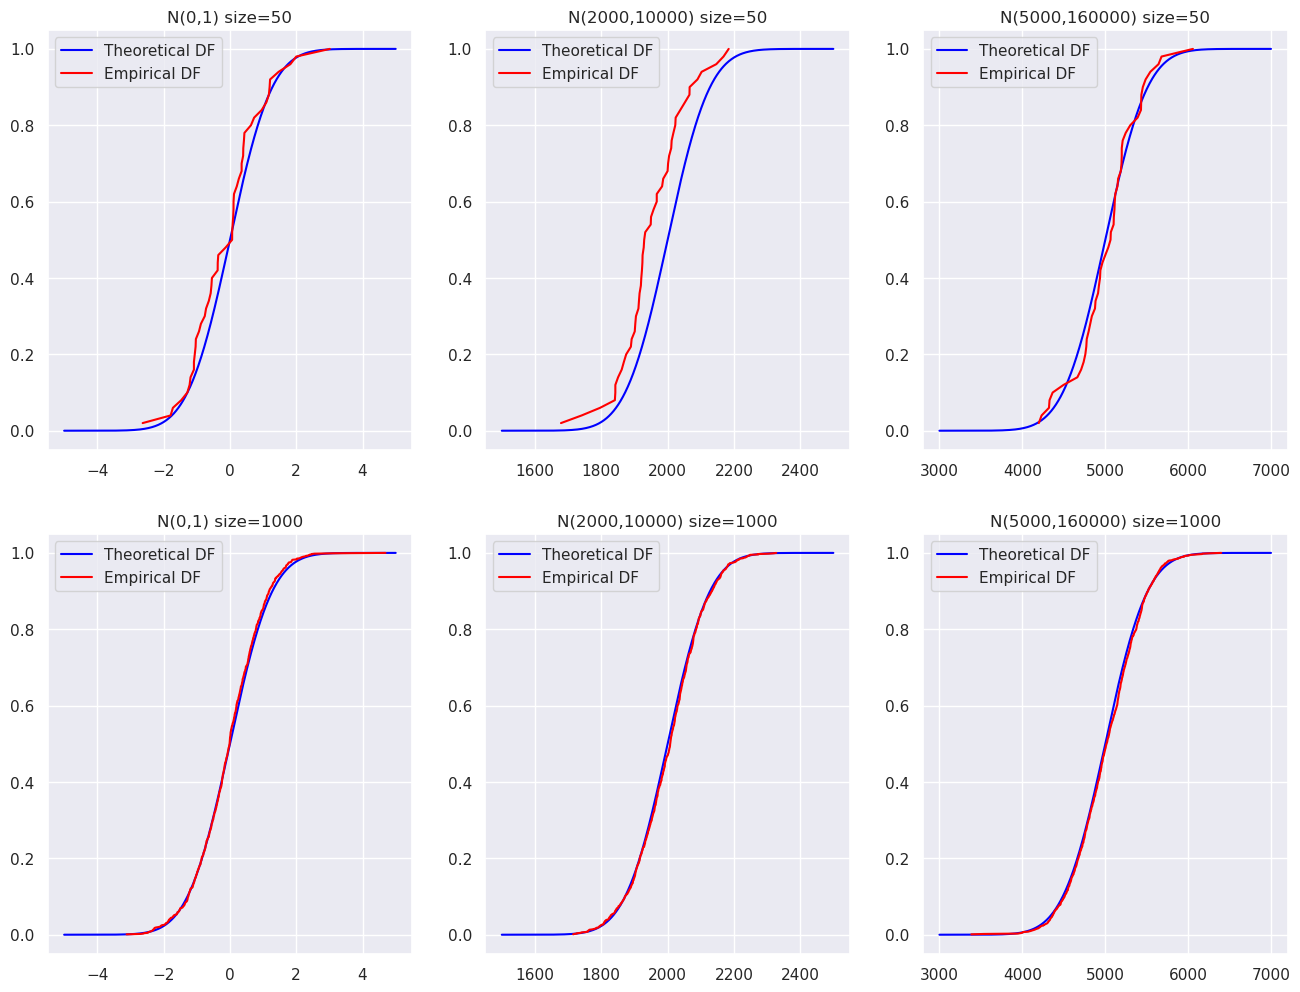

In [55]:
from statsmodels.distributions.empirical_distribution import ECDF
sns.set_style("darkgrid")
f, axes = plt.subplots(2,3, figsize=(16, 12))

for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        
        #Theoretical DF
        x_theor = np.linspace(locs[i] - 5 * scales[i],\
                              locs[i] + 5 * scales[i],\
                              num=1000)
        y_theor = norm.cdf(x_theor, locs[i], scales[i])
        sns.lineplot(x=x_theor, y=y_theor, color="blue", label='Theoretical DF', ax=axes[j, i])
        
        #Empirical DF
        ecdf = ECDF(sample)
        sns.lineplot(x=ecdf.x, y=ecdf.y, color="red", label="Empirical DF", ax=axes[j, i])
        
        plt.legend
        axes[j, i].title.set_text(f"N({locs[i]},{scales[i]**2}) size={sizes[j]}")

In [56]:
%%R
graph_distr_fun <- function(sample, mean, scale, size){
    #Empirical DF
    plot(sort(sample), (1:size)/size, type="S", col="blue", ylab="", xlab="",
        main=glue("N({mean}, {scale**2}) size={size}"))

    #Theoretical DF
    x = seq(mean - 5*scale, mean + 5*scale, by=1/100)
    lines(x, pnorm(x, mean=mean, sd=scale), type="l", col="red", lwd=2)
    
    legend("bottomright", legend = c("Empirical DF", "Theoretical DF"),
            col = c("blue", "red"), lwd = 2)
}

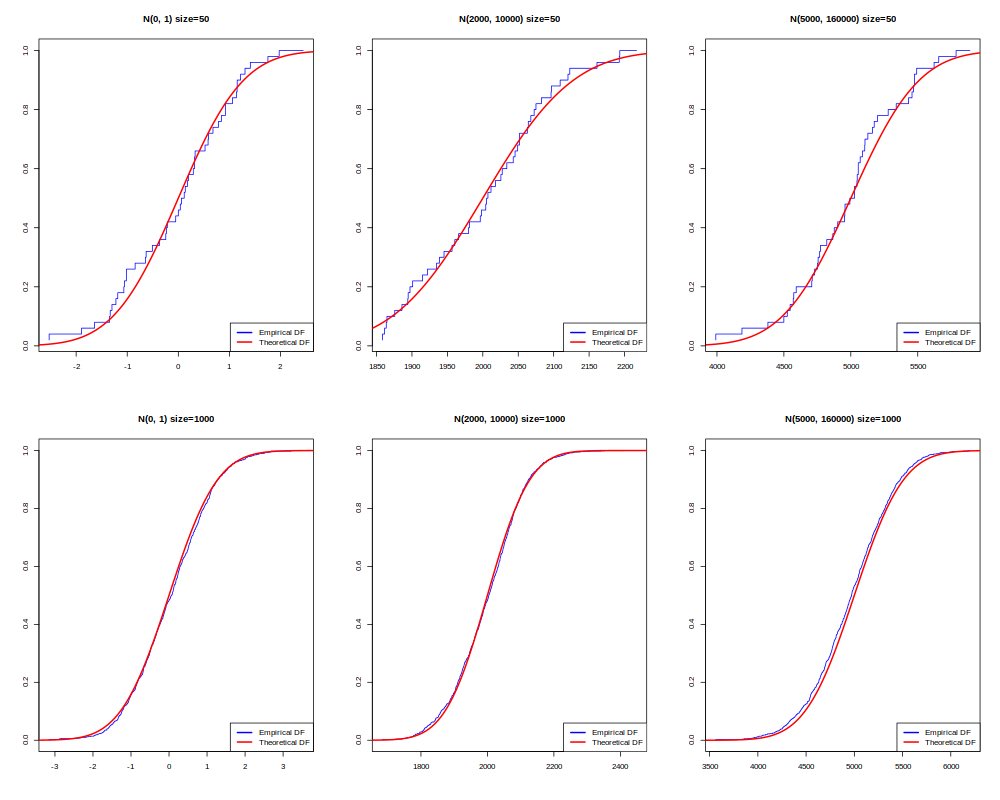

In [68]:
%%R -h 800 -w 1000
par(mfrow=c(2,3))

graph1 <- graph_distr_fun(sample1, 0, 1, 50)
graph2 <- graph_distr_fun(sample2, 2000, 100, 50)
graph3 <- graph_distr_fun(sample3, 5000, 400, 50)
graph4 <- graph_distr_fun(sample4, 0, 1, 1000)
graph5 <- graph_distr_fun(sample5, 2000, 100, 1000)
graph6 <- graph_distr_fun(sample6, 5000, 400, 1000)

# QQplot

In [69]:
from statsmodels.graphics.gofplots import qqplot

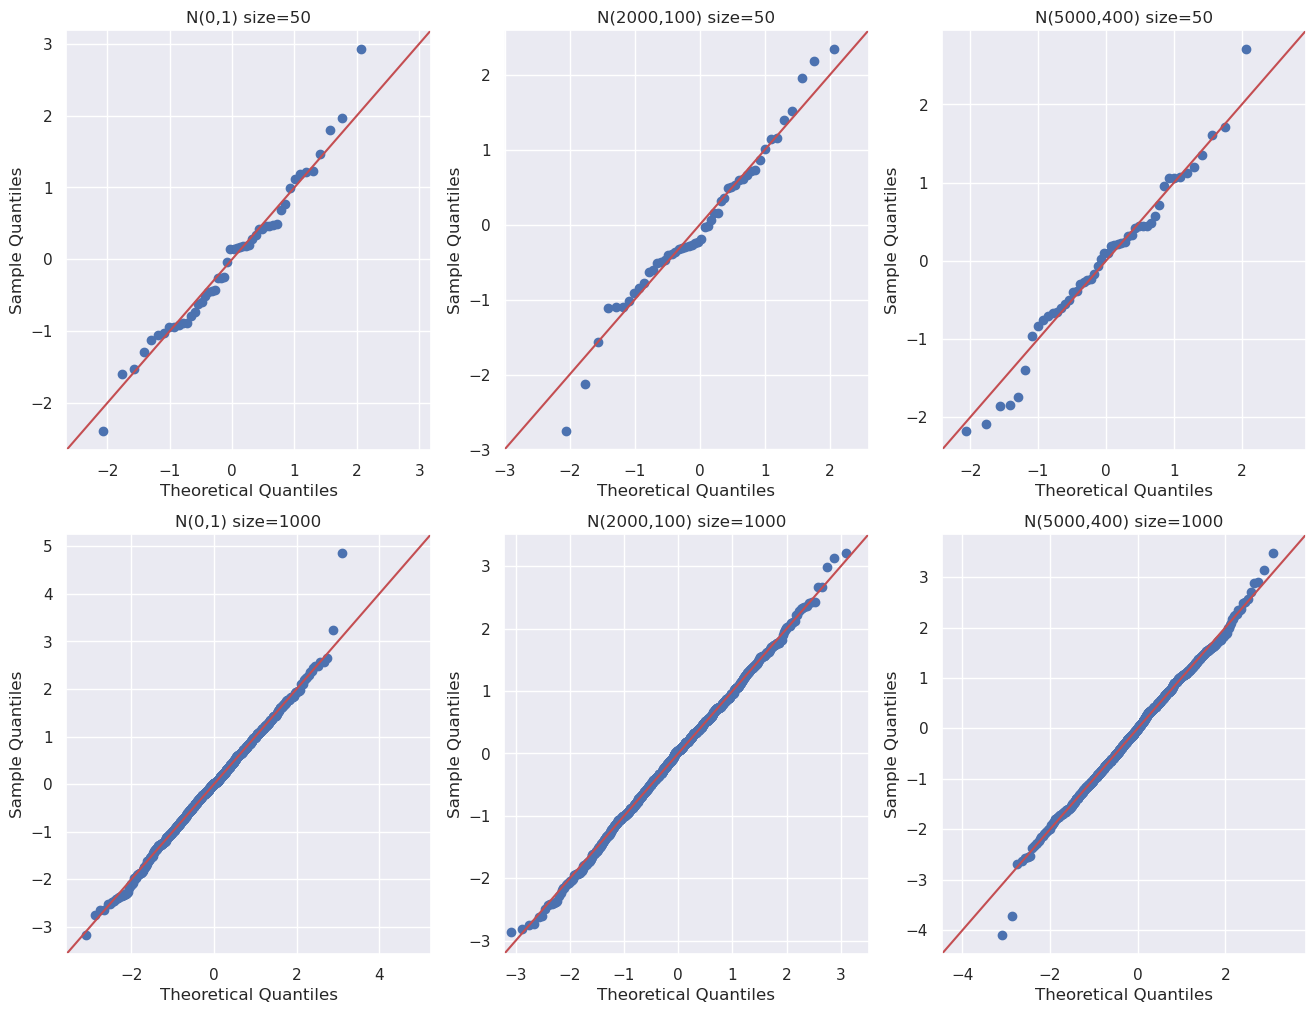

In [70]:
f, axes = plt.subplots(2,3, figsize=(16, 12))#, sharex=True, sharey=True) # 1 row, 1 column

for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]

        qqplot(sample, fit=True, line="45",ax = axes[j, i]);
        axes[j, i].title.set_text(f"N({locs[i]},{scales[i]}) size={sizes[j]}")

In [71]:
%%R
qqgraph <- function(sample, i){
  qqnorm(sample, main=glue("sample{i}"))
  qqline(sample)
}

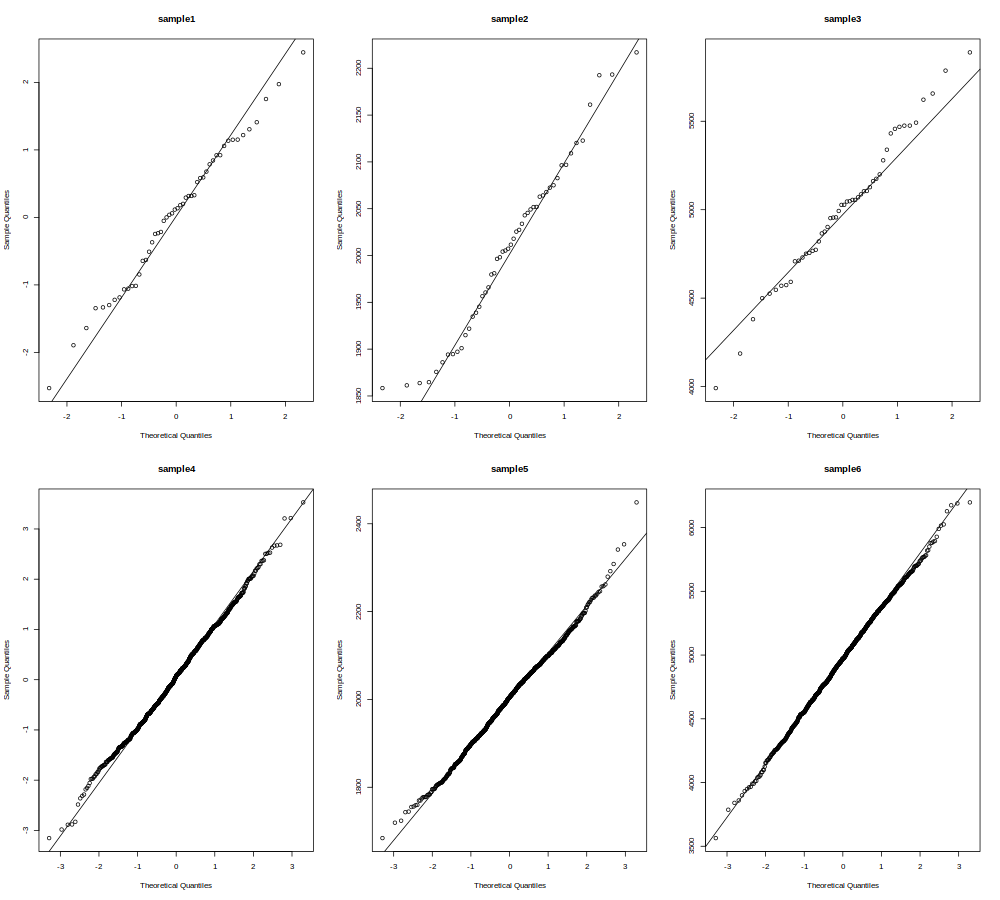

In [73]:
%%R -h 900 -w 1000
par(mfrow=c(2,3))
qqgraph(sample1, 1)
qqgraph(sample2, 2)
qqgraph(sample3, 3)
qqgraph(sample4, 4)
qqgraph(sample5, 5)
qqgraph(sample6, 6)

# Метод Огибающих

In [74]:
%%R
envelmet <- function(x, i){
  z <- (x - mean(x))/sqrt(var(x))  #  Стандартизация выборки
  x.qq <- qqnorm(z, plot.it = FALSE)
  x.qq <- lapply(x.qq, sort)
  plot(x.qq, ylim = c(-10, 10), ylab = "Z-статистики выборки", 
  xlab = "Квантили", main = glue("sample{i}"))
}

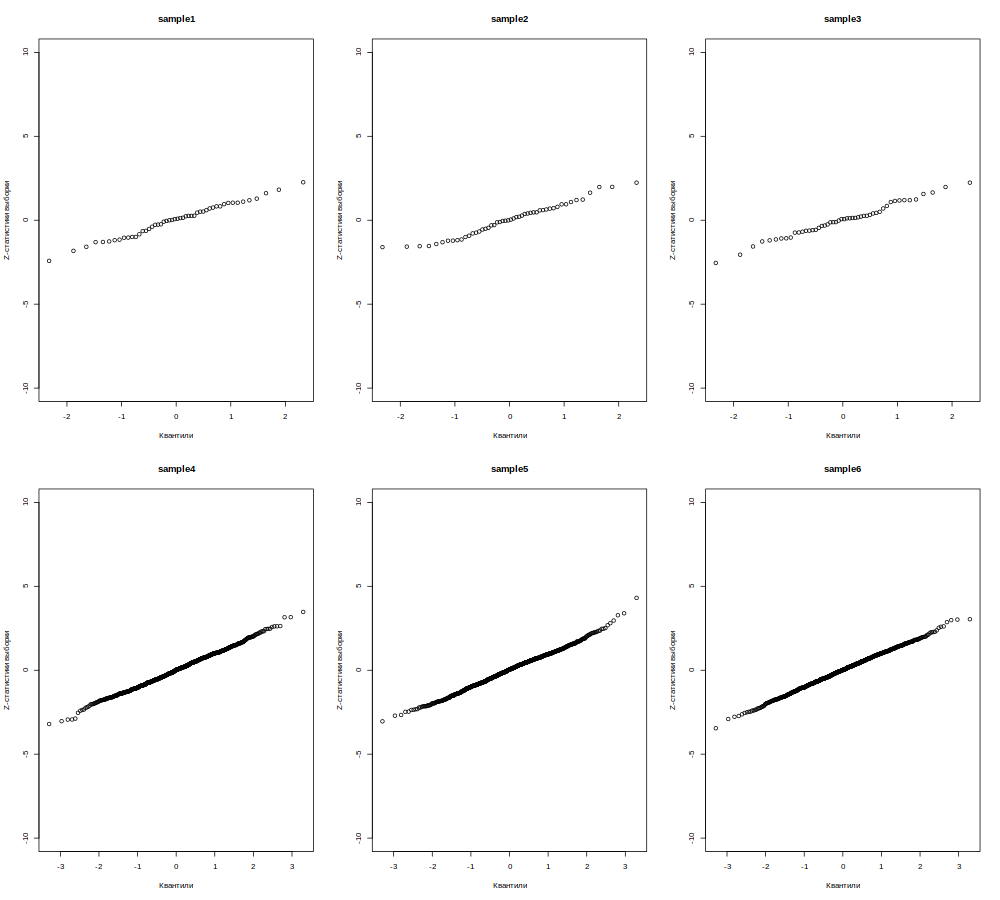

In [75]:
%%R -h 900 -w 1000
par(mfrow=c(2,3))

envelmet(sample1, 1)
envelmet(sample2, 2)
envelmet(sample3, 3)
envelmet(sample4, 4)
envelmet(sample5, 5)
envelmet(sample6, 6)

# Тест Колмогорова-Смирнова

In [76]:
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = stats.kstest(sample, "norm", args=(locs[i], scales[i]))
        print(f"size = {sizes[j]}, mean = {locs[i]}, std = {scales[i]}\n{stat = }, {pvalue = }\n")

size = 50, mean = 0, std = 1
stat = 0.11087380395389412, pvalue = 0.5338428347822113

size = 50, mean = 2000, std = 100
stat = 0.26963764718942484, pvalue = 0.0010601636489873112

size = 50, mean = 5000, std = 400
stat = 0.09757644282275815, pvalue = 0.6912624236083766

size = 1000, mean = 0, std = 1
stat = 0.023816976233157705, pvalue = 0.6131150522766826

size = 1000, mean = 2000, std = 100
stat = 0.037436392823974596, pvalue = 0.1182161633896347

size = 1000, mean = 5000, std = 400
stat = 0.04049561991011519, pvalue = 0.07322881555579652



In [77]:
%%R
print(ks.test(sample1, "pnorm", 0, 1))
print(ks.test(sample2, "pnorm", 2000, 100))
print(ks.test(sample3, "pnorm", 5000, 400))
print(ks.test(sample4, "pnorm", 0, 1))
print(ks.test(sample5, "pnorm", 2000, 100))
print(ks.test(sample6, "pnorm", 5000, 400))


	Exact one-sample Kolmogorov-Smirnov test

data:  sample1
D = 0.084781, p-value = 0.8352
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  sample2
D = 0.085634, p-value = 0.8264
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  sample3
D = 0.075667, p-value = 0.9163
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample4
D = 0.035083, p-value = 0.1705
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample5
D = 0.029701, p-value = 0.3409
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample6
D = 0.042273, p-value = 0.05609
alternative hypothesis: two-sided



# Тест Андерсона-Дарлинга

Замечание statsmodels.stats.diagnostic.normal_ad возьмёт в качестве параметров распределия  
выборочное среднее и несмещённое стандартное отклонение

In [78]:
from statsmodels.stats.diagnostic import normal_ad as ad_test
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = ad_test(sample)
        print(f"size = {sizes[j]}, mean = {locs[i]}, std = {scales[i]}\n{stat = }, {pvalue = }\n")

size = 50, mean = 0, std = 1
stat = 0.3284757445725859, pvalue = 0.5090516315036815

size = 50, mean = 2000, std = 100
stat = 0.39824534649816457, pvalue = 0.3536776707970687

size = 50, mean = 5000, std = 400
stat = 0.36570718892997434, pvalue = 0.4220963189661951

size = 1000, mean = 0, std = 1
stat = 0.26437094573930153, pvalue = 0.6960711193858642

size = 1000, mean = 2000, std = 100
stat = 0.2939425945255607, pvalue = 0.5997004513100976

size = 1000, mean = 5000, std = 400
stat = 0.3776037921613806, pvalue = 0.40805838472844136



In [79]:
%%R
library(nortest)
print(ad.test(sample1))
print(ad.test(sample2))
print(ad.test(sample3))
print(ad.test(sample4))
print(ad.test(sample5))
print(ad.test(sample6))


	Anderson-Darling normality test

data:  sample1
A = 0.24354, p-value = 0.7531


	Anderson-Darling normality test

data:  sample2
A = 0.32381, p-value = 0.5162


	Anderson-Darling normality test

data:  sample3
A = 0.26737, p-value = 0.6723


	Anderson-Darling normality test

data:  sample4
A = 0.49518, p-value = 0.214


	Anderson-Darling normality test

data:  sample5
A = 0.64638, p-value = 0.09149


	Anderson-Darling normality test

data:  sample6
A = 0.21722, p-value = 0.8423



# Тест Крамера фон Мизеса

In [80]:
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = stats.cramervonmises(sample, 'norm', args=(locs[i], scales[i])).statistic,\
                       stats.cramervonmises(sample, 'norm', args=(locs[i], scales[i])).pvalue
        print(f"N({locs[i]},{scales[i]}) size = {sizes[j]}\n{stat = }, {pvalue = }\n")

N(0,1) size = 50
stat = 0.12652494232185194, pvalue = 0.471115074223003

N(2000,100) size = 50
stat = 1.2541789925257294, pvalue = 0.0005647028245521213

N(5000,400) size = 50
stat = 0.10316500672021948, pvalue = 0.5713490414786984

N(0,1) size = 1000
stat = 0.1331765266323705, pvalue = 0.44523128030753534

N(2000,100) size = 1000
stat = 0.22875401970998865, pvalue = 0.2180637673180137

N(5000,400) size = 1000
stat = 0.2767326345325914, pvalue = 0.1574322680760989



In [81]:
%%R
print(cvm.test(sample1))
print(cvm.test(sample2))
print(cvm.test(sample3))
print(cvm.test(sample4))
print(cvm.test(sample5))
print(cvm.test(sample6))


	Cramer-von Mises normality test

data:  sample1
W = 0.039777, p-value = 0.6787


	Cramer-von Mises normality test

data:  sample2
W = 0.036421, p-value = 0.7404


	Cramer-von Mises normality test

data:  sample3
W = 0.045425, p-value = 0.5748


	Cramer-von Mises normality test

data:  sample4
W = 0.073263, p-value = 0.2533


	Cramer-von Mises normality test

data:  sample5
W = 0.10042, p-value = 0.1108


	Cramer-von Mises normality test

data:  sample6
W = 0.030303, p-value = 0.8431



# Тест Лиллиефорса

In [82]:
from statsmodels.stats.diagnostic import lilliefors
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = lilliefors(sample)
        print(f"N({locs[i]},{scales[i]}) size = {sizes[j]}\n{stat = }, {pvalue = }\n")

N(0,1) size = 50
stat = 0.09094304530212571, pvalue = 0.38251689669786665

N(2000,100) size = 50
stat = 0.09673490336287588, pvalue = 0.285091826676084

N(5000,400) size = 50
stat = 0.07740043368658112, pvalue = 0.6327170990270895

N(0,1) size = 1000
stat = 0.018134858368808904, pvalue = 0.6673259768130475

N(2000,100) size = 1000
stat = 0.023567129594584513, pvalue = 0.2495968600544056

N(5000,400) size = 1000
stat = 0.024223599927328254, pvalue = 0.22257001590552922



In [83]:
%%R
print(lillie.test(sample1))
print(lillie.test(sample2))
print(lillie.test(sample3))
print(lillie.test(sample4))
print(lillie.test(sample5))
print(lillie.test(sample6))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample1
D = 0.080018, p-value = 0.5873


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample2
D = 0.07425, p-value = 0.7022


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample3
D = 0.075788, p-value = 0.6719


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample4
D = 0.021112, p-value = 0.3447


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample5
D = 0.022622, p-value = 0.246


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample6
D = 0.014012, p-value = 0.905



# Тест Шапиро-Уилка

Ограничение на размер выборки 5000. Мы проходим.

In [84]:
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = stats.shapiro(sample)
        print(f"N({locs[i]},{scales[i]}) size = {sizes[j]}\n{stat = }, {pvalue = }\n")

N(0,1) size = 50
stat = 0.9832391738891602, pvalue = 0.6940747499465942

N(2000,100) size = 50
stat = 0.9803583025932312, pvalue = 0.5671716928482056

N(5000,400) size = 50
stat = 0.9796740412712097, pvalue = 0.5382983088493347

N(0,1) size = 1000
stat = 0.9969052076339722, pvalue = 0.04884222522377968

N(2000,100) size = 1000
stat = 0.9987080693244934, pvalue = 0.6939663290977478

N(5000,400) size = 1000
stat = 0.9978259205818176, pvalue = 0.2171912044286728



In [85]:
%%R
print(shapiro.test(sample1))
print(shapiro.test(sample2))
print(shapiro.test(sample3))
print(shapiro.test(sample4))
print(shapiro.test(sample5))
print(shapiro.test(sample6))


	Shapiro-Wilk normality test

data:  sample1
W = 0.98986, p-value = 0.9429


	Shapiro-Wilk normality test

data:  sample2
W = 0.97013, p-value = 0.2342


	Shapiro-Wilk normality test

data:  sample3
W = 0.98848, p-value = 0.9043


	Shapiro-Wilk normality test

data:  sample4
W = 0.99808, p-value = 0.3174


	Shapiro-Wilk normality test

data:  sample5
W = 0.99677, p-value = 0.03891


	Shapiro-Wilk normality test

data:  sample6
W = 0.99901, p-value = 0.8761



# 6. Анализ данных с помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности на реальных данных.

### Построим qqplot для некоторых признаков. Видим, что распределение признаков отвечающих за габариты (оссобенно за длину и ширину) больше похожи на нормальные. 

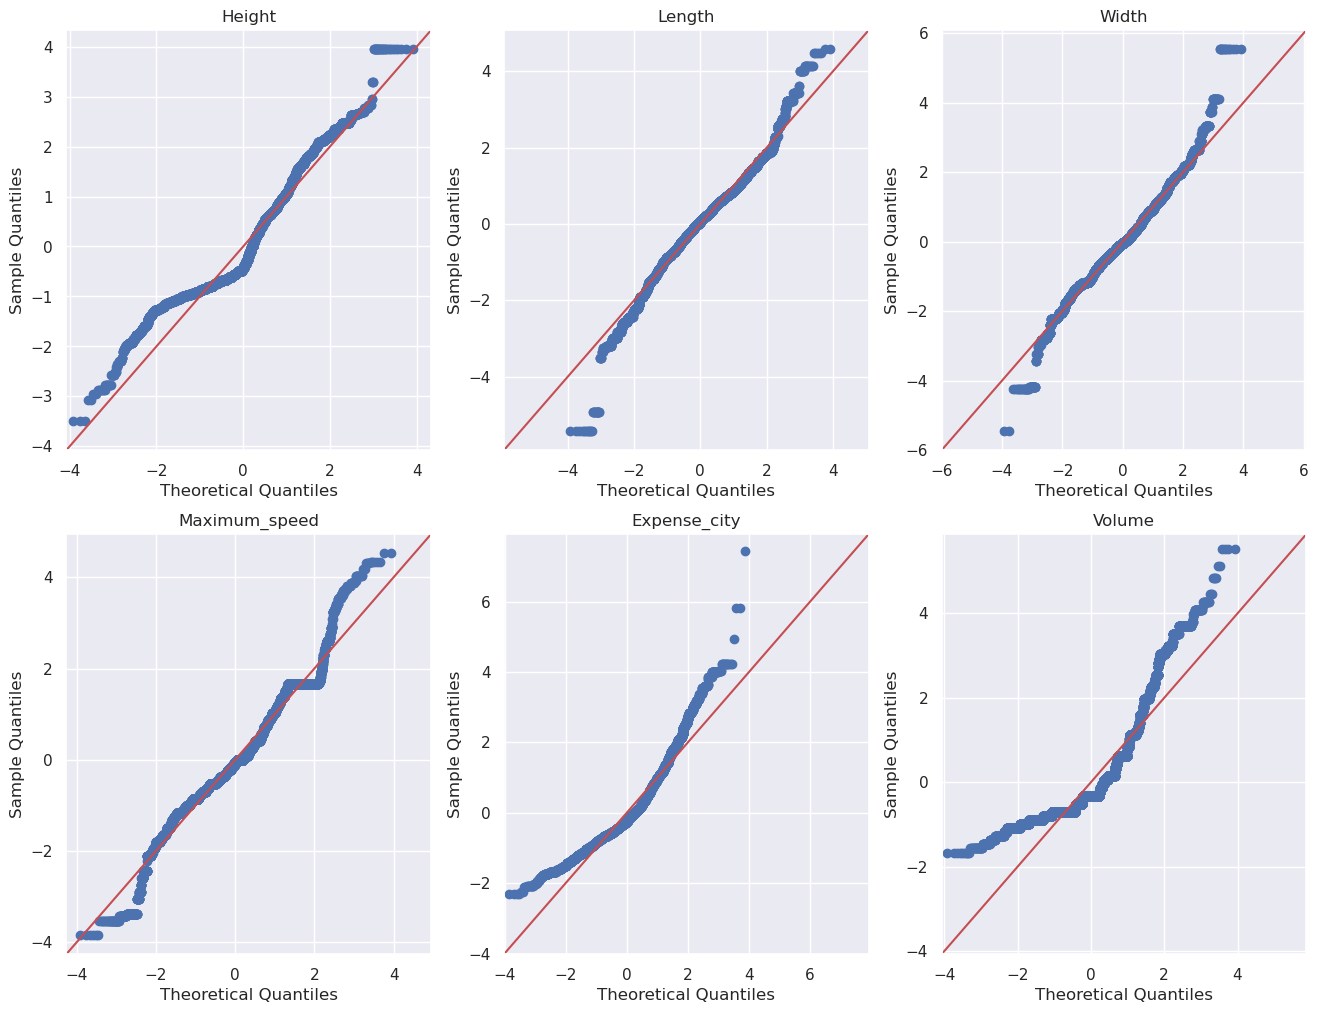

In [86]:
f, axes = plt.subplots(2,3, figsize=(16, 12))#, sharex=True, sharey=True) # 1 row, 1 column

qqplot(df.Height, fit=True, line="45",ax = axes[0, 0]);
axes[0, 0].title.set_text("Height")

qqplot(df.Length, fit=True, line="45",ax = axes[0, 1]);
axes[0, 1].title.set_text("Length")

qqplot(df.Width, fit=True, line="45",ax = axes[0, 2]);
axes[0, 2].title.set_text("Width")

qqplot(df.Maximum_speed, fit=True, line="45",ax = axes[1, 0]);
axes[1, 0].title.set_text("Maximum_speed")

qqplot(df.Expense_city[df.Expense_city != 0], fit=True, line="45",ax = axes[1, 1]);
axes[1, 1].title.set_text("Expense_city")

qqplot(df.Volume[df.Volume != 0], fit=True, line="45",ax = axes[1, 2]);
axes[1, 2].title.set_text("Volume")

In [87]:
%%R
qqgraph <- function(sample, name){
  qqnorm(sample, main=name)
  qqline(sample)
}

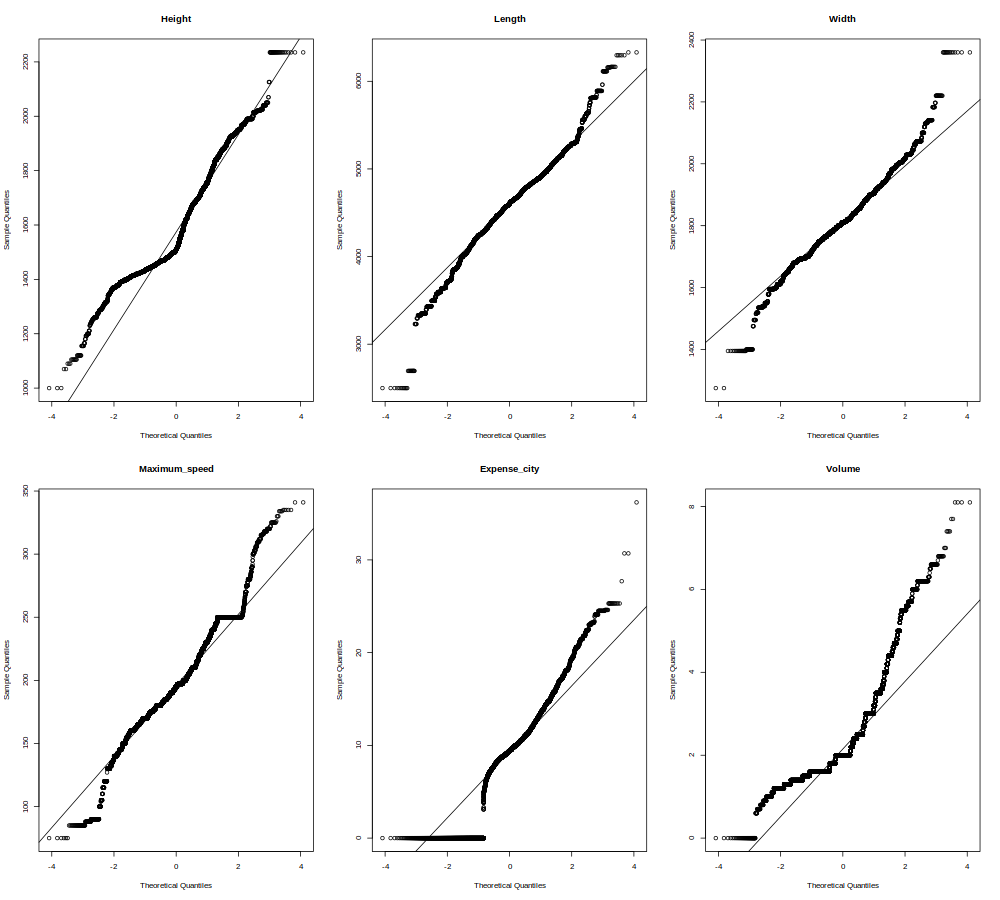

In [89]:
%%R -h 900 -w 1000
par(mfrow=c(2,3))

qqgraph(df$Height, "Height")
qqgraph(df$Length, "Length")
qqgraph(df$Width, "Width")
qqgraph(df$Maximum_speed, "Maximum_speed")
qqgraph(df$Expense_city, "Expense_city")
qqgraph(df$Volume, "Volume")

### Создадим выборки для длины, ширины и проведём на них тест на нормальность.

In [90]:
sample_width = df.Width
sample_length = df.Length

In [91]:
%%R
sample_width <- df$Width
sample_length <- df$Length

### Тест Колмогорова-Смирнова

In [92]:
stat, pvalue = stats.kstest(sample_width, "norm", args=(sample_width.mean(), sample_width.std(ddof=1)))
print(f"Width: {stat = }, {pvalue = }\n")

stat, pvalue = stats.kstest(sample_length, "norm", args=(sample_length.mean(), sample_length.std(ddof=1)))
print(f"Length: {stat = }, {pvalue = }\n")

Width: stat = 0.05474346245739292, pvalue = 1.4203200058561878e-59

Length: stat = 0.043192087255885914, pvalue = 3.070807224858721e-37



In [93]:
%%R
print(ks.test(sample_width, "pnorm", mean(sample_width), sd(sample_width)))
print(ks.test(sample_length, "pnorm", mean(sample_length), sd(sample_length)))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample_width
D = 0.054743, p-value < 2.2e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample_length
D = 0.043192, p-value < 2.2e-16
alternative hypothesis: two-sided



In addition: Warning messages:
1: In ks.test.default(sample_width, "pnorm", mean(sample_width), sd(sample_width)) :
  ties should not be present for the Kolmogorov-Smirnov test
2: In ks.test.default(sample_length, "pnorm", mean(sample_length),  :
  ties should not be present for the Kolmogorov-Smirnov test


### Тест Андерсона-Дарлинга 

In [94]:
stat, pvalue = ad_test(sample_width)
print(f"Width: {stat = }, {pvalue = }\n")

stat, pvalue = ad_test(sample_length)
print(f"Length: {stat = }, {pvalue = }\n")

Width: stat = 60.718621700780204, pvalue = 0.0

Length: stat = 79.35115163918817, pvalue = 0.0



In [95]:
%%R
print(ad.test(sample_width))
print(ad.test(sample_length))


	Anderson-Darling normality test

data:  sample_width
A = 60.719, p-value < 2.2e-16


	Anderson-Darling normality test

data:  sample_length
A = 79.351, p-value < 2.2e-16



### Тест Лиллиефорса

In [96]:
stat, pvalue = lilliefors(sample_width)
print(f"Width: {stat = }, {pvalue = }\n")

stat, pvalue = lilliefors(sample_length)
print(f"Length: {stat = }, {pvalue = }\n")

Width: stat = 0.0547434624573927, pvalue = 0.0009999999999998899

Length: stat = 0.04319208725588569, pvalue = 0.0009999999999998899



In [97]:
%%R
print(lillie.test(sample_width))
print(lillie.test(sample_length))


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample_width
D = 0.054743, p-value < 2.2e-16


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample_length
D = 0.043192, p-value < 2.2e-16



### Тест Шапиро-Уилка

In [98]:
stat, pvalue = stats.shapiro(sample_width)
print(f"Width: {stat = }, {pvalue = }\n")

stat, pvalue = stats.shapiro(sample_length)
print(f"Length: {stat = }, {pvalue = }\n")

Width: stat = 0.9865264296531677, pvalue = 4.5100791074294237e-41

Length: stat = 0.9828482866287231, pvalue = 5.605193857299268e-45



In [99]:
%%R
print(shapiro.test(sample(sample_width, 5000)))
print(shapiro.test(sample(sample_length, 5000)))


	Shapiro-Wilk normality test

data:  sample(sample_width, 5000)
W = 0.98363, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  sample(sample_length, 5000)
W = 0.98252, p-value < 2.2e-16



### Как видим выше, несмотря на неплохие графики qqplot все тесты уверенно отвергают гипотезу о том, что признаки распределны нормально. 

# 6-ой пункт закончился. Всё что дальше пока в работе

# Линейная регрессия

In [115]:
features = df.dtypes.drop(['Price', 'Maximum_power', 'Maximum_speed']).index.values

In [116]:
numeric_features = df.dtypes[(df.dtypes == 'float64') | (df.dtypes == 'int64')].drop(['Price', 'Maximum_power',\
                                    'Cylinders', 'Maximum_speed', 'Transmissions']).index.values

In [117]:
categorical_features = df.dtypes[(df.dtypes == 'object') | (df.dtypes.index.isin(['Cylinders',\
    'Transmissions']))].drop(['mark', 'Country', 'Color', 'Generation', 'Model', \
    'Front_Suspension_type', 'Wheel_size']).index.values

In [118]:
target = df['Price']

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [121]:
# # Разбиение датасета на train и test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

# Задание классификатора и его обучение
clf = LinearRegression()

clf.fit(X_train[numeric_features], y_train)
y_pred = clf.predict(X_test[numeric_features])
y_train_pred = clf.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mse(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mse(y_train, y_train_pred, squared=False))

Test RMSE = 1415404.7874
Train RMSE = 2059958.9156


In [122]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = clf.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mse(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mse(y_train, y_train_pred, squared=False))

Test RMSE = 1415400.5927
Train RMSE = 2059958.9156


In [129]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test RMSE = %.4f" % mse(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mse(y_train, y_train_pred, squared=False))

Test RMSE = 1313020.7855
Train RMSE = 1802214.4248


In [132]:
from sklearn.metrics import make_scorer

mse_scorer = make_scorer(
    mse,
    greater_is_better=False
)

In [140]:
from sklearn.model_selection import cross_val_score

model = Ridge()
cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=20, scoring=mse_scorer)
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -2764314249320.4751
	-1611862752395.7678
	-1211398714875.2217
	-1973212671894.2249
	-3431267408556.6353
	-17821293520349.9141
	-2796007603719.3921
	-1749187393599.0637
	-1458997008112.6667
	-19186448599928.4023
	-2439182044828.5195
	-1433872242646.2891
	-2012848021974.2505
	-1782194273954.7800
	-4516115368507.5488
	-1391558772466.0293
	-2410379173171.0923
	-4869423685570.0137
	-2110990733423.6372
	-1672754646944.0891
Mean CV RMSE = 3932165444311.9014


In [124]:
from sklearn.metrics import r2_score
print("Test r2 = %.4f" % r2_score(y_test, y_pred))
print("Train r2 = %.4f" % r2_score(y_train, y_train_pred))

Test r2 = 0.4499
Train r2 = 0.5550


In [125]:
y_pred = np.full(len(y_test), np.median(y_train))
y_train_pred = np.full(len(y_train), np.median(y_train))

print("Test RMSE = %.4f" % r2_score(y_test, y_pred))
print("Train RMSE = %.4f" % r2_score(y_train, y_train_pred))

print("Test r2 = %.4f" % r2_score(y_test, y_pred))
print("Train r2 = %.4f" % r2_score(y_train, y_train_pred))

Test RMSE = -0.0614
Train RMSE = -0.0774
Test r2 = -0.0614
Train r2 = -0.0774
